# DATA ANALYSIS & MODELLING WITH PYTHON 

# Library

In [5]:
#LIBRARY WAJIB
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import *

import seaborn as sns
from wordcloud import WordCloud
import mplcyberpunk
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

import warnings 
warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")

In [154]:
#karena data nya sangat sedikit saya tidak akan mengunakan teknik boosting disini

#data pre-processing library
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import (classification_report, accuracy_score,log_loss,roc_auc_score,
                             plot_confusion_matrix, plot_roc_curve)

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#Regressions
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [3]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.0
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5.0
mpl.rcParams["axes.titlepad"] = 10.0
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

In [124]:
train = pd.read_csv("/storage/emulated/0/Participant_Data_Tea_Story/train.csv")
test = pd.read_csv("/storage/emulated/0/Participant_Data_Tea_Story/test.csv")
sub = pd.read_csv("/storage/emulated/0/Participant_Data_Tea_Story/submission.csv") 

## EDA UNIVARIAT & BIVARIAT

In [6]:
train.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,03/01/09,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,10/01/09,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,17/01/09,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,24/01/09,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,31/01/09,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WeekEnding_Date           544 non-null    object 
 1   Kolkata_Average_Price     544 non-null    object 
 2   Kolkata_Ref_Price         542 non-null    object 
 3   Bangalore_Average_Price   544 non-null    object 
 4   Bangalore_Ref_Price       542 non-null    object 
 5   Cochin_Average_Price      544 non-null    object 
 6   Cochin_Ref_Price          541 non-null    object 
 7   Darjeeling_Average_Price  544 non-null    object 
 8   Darjeeling_Ref_Price      542 non-null    object 
 9   Ernakulam_Average_Price   544 non-null    object 
 10  Ernakulam_Ref_Price       543 non-null    object 
 11  Siliguri_Average_Price    543 non-null    object 
 12  Siliguri_Ref_Price        543 non-null    object 
 13  Guwahati_Average_Price    544 non-null    object 
 14  Guwahati_R

In [8]:
#aneh
train.describe()

,Average
count,544.000000
mean,100.660317
std,13.711767
min,64.171250
25%,89.386429
50%,102.886230
75%,111.793036
max,131.453333


In [17]:
pd.DataFrame({"train/null":train.isnull().sum()/train.shape[0],
              "test/null": test.isnull().sum()/test.shape[0]}) 

,train/null,test/null
WeekEnding_Date,0.000000,0.000000
Kolkata_Average_Price,0.000000,0.689655
Kolkata_Ref_Price,0.003676,0.689655
Bangalore_Average_Price,0.000000,0.689655
Bangalore_Ref_Price,0.003676,0.689655
Cochin_Average_Price,0.000000,0.689655
Cochin_Ref_Price,0.005515,0.689655
Darjeeling_Average_Price,0.000000,0.689655
Darjeeling_Ref_Price,0.003676,0.689655
Ernakulam_Average_Price,0.000000,0.689655


In [4]:
train.duplicated().sum()

0

In [ ]:
#target

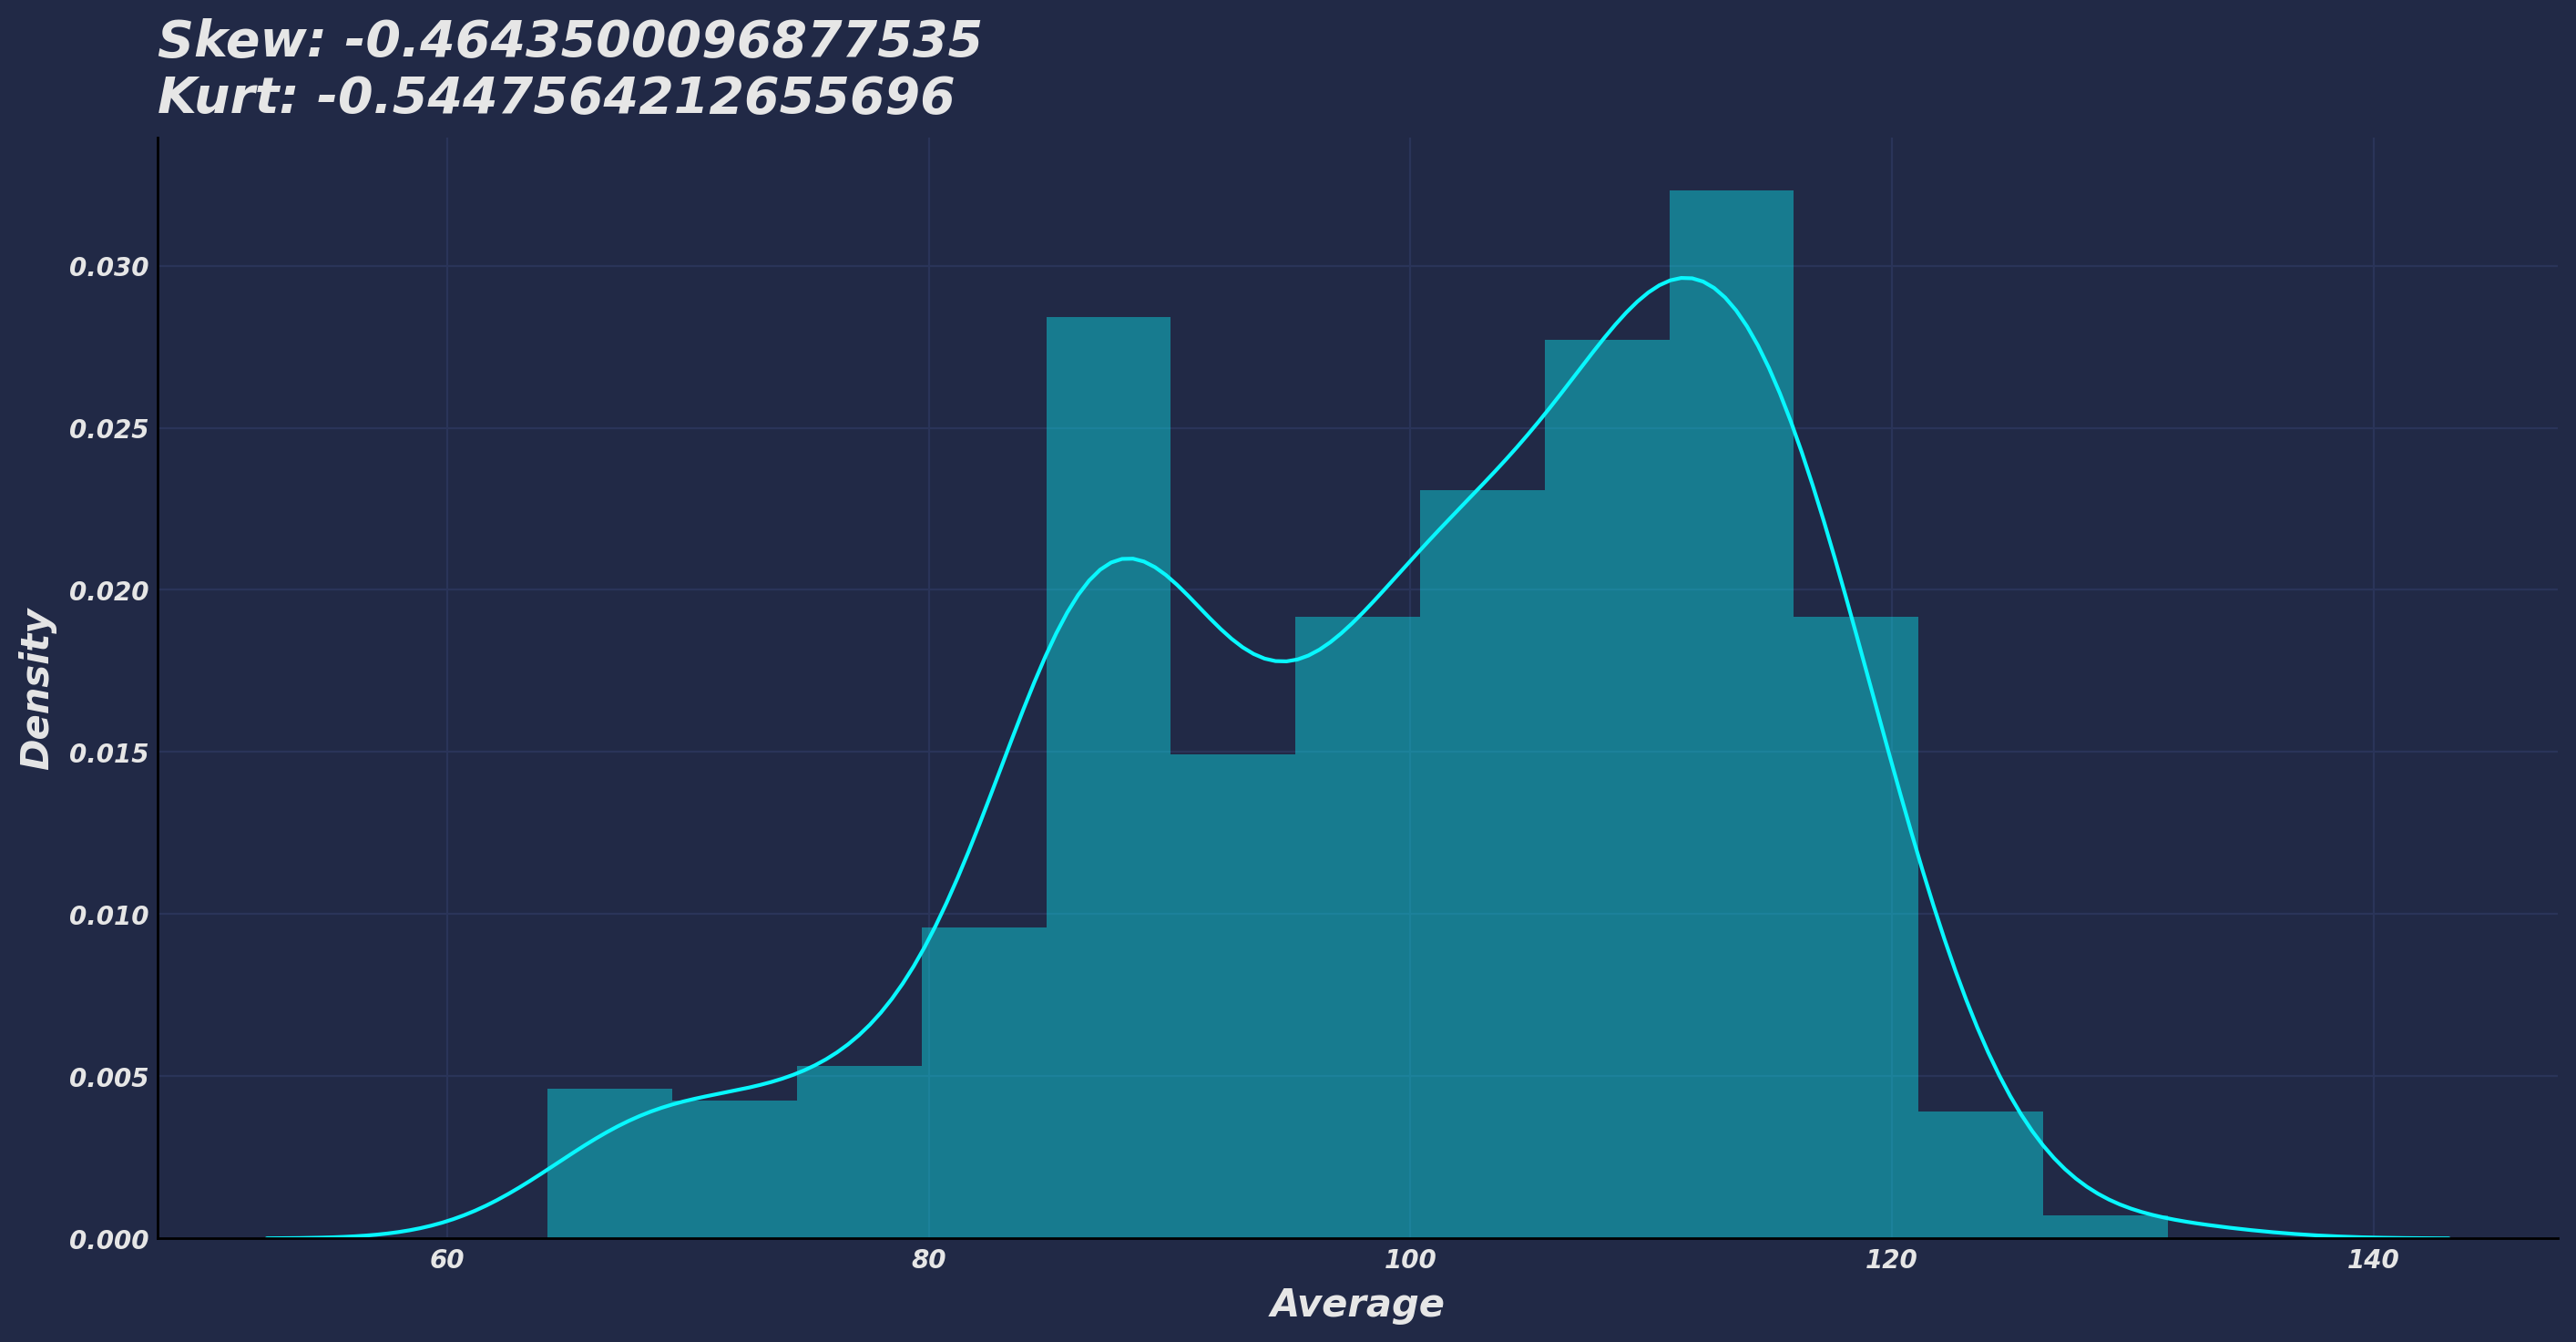

In [72]:
plt.figure(figsize=(17,8))

sns.distplot(train.Average)
plt.title(f"Skew: {train.Average.skew()}\nKurt: {train.Average.kurt()}")
plt.show() 

In [73]:
train.Average.describe()

count    544.000000
mean     100.660317
std       13.711767
min       64.171250
25%       89.386429
50%      102.886230
75%      111.793036
max      131.453333
Name: Average, dtype: float64

In [ ]:
#ubah category ke numeric

In [7]:
price = train.drop(["WeekEnding_Date","Average"],axis=1)

In [84]:
price.dtypes

Kolkata_Average_Price       object
Kolkata_Ref_Price           object
Bangalore_Average_Price     object
Bangalore_Ref_Price         object
Cochin_Average_Price        object
Cochin_Ref_Price            object
Darjeeling_Average_Price    object
Darjeeling_Ref_Price        object
Ernakulam_Average_Price     object
Ernakulam_Ref_Price         object
Siliguri_Average_Price      object
Siliguri_Ref_Price          object
Guwahati_Average_Price      object
Guwahati_Ref_Price          object
dtype: object

In [8]:
#check jika ada TYPO
Typo = []
for col in price.columns:
    for check in train[col].unique(): 
        try: 
            float(check)
        except ValueError: 
            Typo.append(check) 

In [9]:
set(Typo) 

{'N. S.', 'N.S', 'N.S.', 'N.S.\xa0', 'NS', 'NS85.07', 'No Sale', 'No sale'}

In [125]:
#ganti nilai yang gak masuk akal dengan nan
for i in price.columns: 
    train[i] = train[i].replace(["No Sale","No sale", "N.S.","N.S", "N. S.","NS","N.S.\xa0","NS85.07"], np.nan) 
    test[i] = test[i].replace(["No Sale", "No sale","N.S.","N.S", "N. S.","NS","N.S.\xa0","NS85.07"],np.nan) 
    

In [126]:
for i in price.columns: 
    train[i] = train[i].astype("float") 
    test[i] = test[i].astype("float") 

In [103]:
# descriptive analysis train & test
train.describe()

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
count,504.000000,502.000000,497.000000,495.000000,499.000000,495.000000,507.000000,506.000000,529.000000,527.000000,523.000000,521.000000,535.000000,535.000000,544.000000
mean,139.045298,133.550498,129.494125,123.785091,120.611242,115.338081,100.848008,95.541759,79.730737,76.845693,84.875258,81.000250,71.558280,69.369346,100.660317
std,22.459919,25.077643,22.117483,24.466831,18.498616,20.331944,16.667111,18.133782,14.708237,14.382819,15.605081,15.111085,14.750031,14.153720,13.711767
min,67.640000,64.790000,66.400000,55.650000,71.290000,57.020000,62.290000,0.000000,0.000000,50.530000,11.600000,52.070000,0.000000,43.110000,64.171250
25%,124.510000,117.932500,114.150000,107.380000,108.245000,102.425000,86.210000,82.590000,68.940000,65.385000,72.420000,70.210000,59.455000,57.550000,89.386429
50%,144.695000,135.485000,132.190000,125.900000,122.910000,118.830000,100.460000,95.780000,77.570000,74.710000,83.530000,80.160000,69.140000,67.230000,102.886230
75%,155.955000,153.532500,146.800000,142.105000,132.935000,129.385000,112.825000,109.647500,92.280000,87.150000,97.190000,92.730000,84.430000,80.310000,111.793036
max,189.380000,189.380000,177.290000,177.330000,165.070000,165.070000,137.240000,137.250000,110.750000,110.750000,117.470000,117.470000,101.730000,101.730000,131.453333


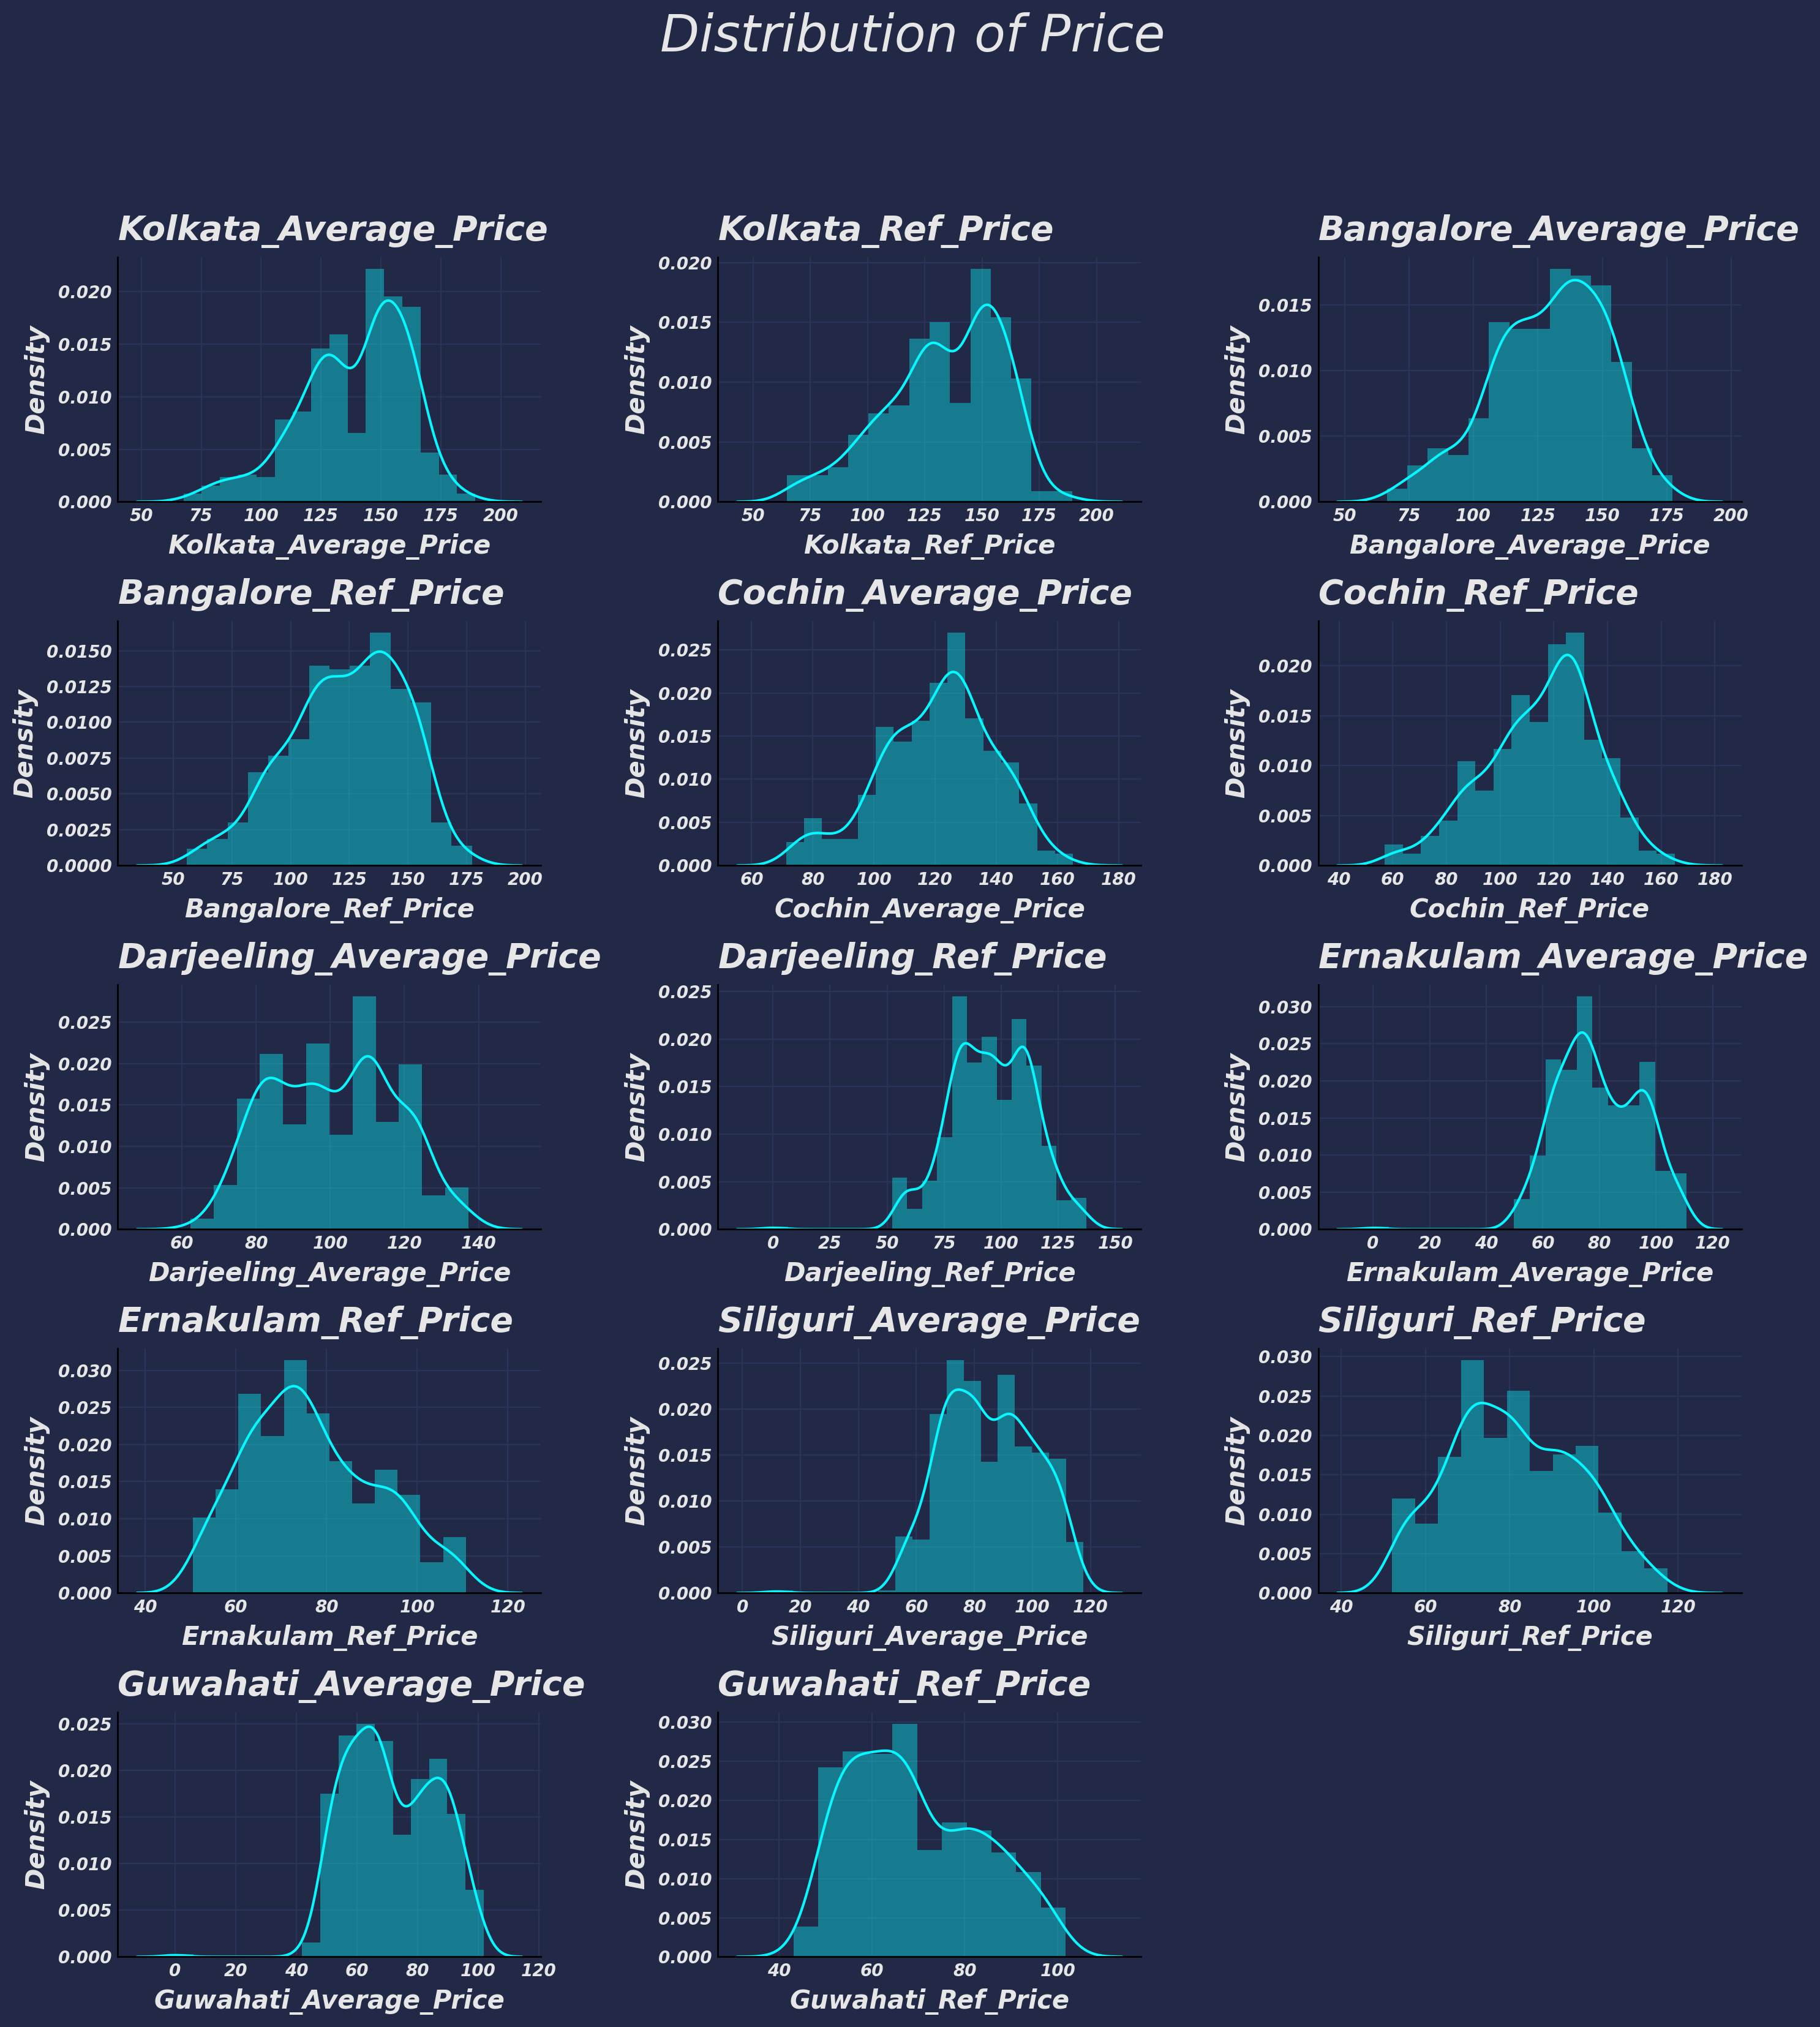

In [107]:
#plot

plt.figure(figsize=(15,15)) 

for i,j in enumerate(price.columns): 
    plt.subplot(5,3,i+1) 
    
    sns.distplot(train[j])
    plt.title(j)
    
plt.suptitle("Distribution of Price",size=30, y=1.1) 
plt.tight_layout()
plt.show()

In [109]:
for i in price.columns:
    print(f"\nfeature {i}") 
    print(f"skew: {train[i].skew()}") 
    print(f"Kurt: {train[i].kurt()}")


feature Kolkata_Average_Price
skew: -0.6328459427728693
Kurt: 0.05313081291897115

feature Kolkata_Ref_Price
skew: -0.5567058166516349
Kurt: -0.2995849759216931

feature Bangalore_Average_Price
skew: -0.41862647273722065
Kurt: -0.2669557995336378

feature Bangalore_Ref_Price
skew: -0.3753432230456042
Kurt: -0.43114584271434175

feature Cochin_Average_Price
skew: -0.3700143197319596
Kurt: -0.15315604231242697

feature Cochin_Ref_Price
skew: -0.41795411187905196
Kurt: -0.1619856755393232

feature Darjeeling_Average_Price
skew: 0.03888970890432769
Kurt: -0.9579796391092081

feature Darjeeling_Ref_Price
skew: -0.3315925167530649
Kurt: 0.7846277703271896

feature Ernakulam_Average_Price
skew: -0.12004634785486762
Kurt: 0.553117865636112

feature Ernakulam_Ref_Price
skew: 0.36683236744579584
Kurt: -0.622587464619758

feature Siliguri_Average_Price
skew: -0.10631305041402293
Kurt: -0.16743924549534395

feature Siliguri_Ref_Price
skew: 0.15385869814624015
Kurt: -0.7596841690492022

feature Gu

In [44]:
for i in [train,test]:
    i.fillna(0,inplace=True) 

In [28]:
train.head() 

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,03/01/09,99.01,79.79,NaN,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,10/01/09,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,17/01/09,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,24/01/09,94.14,73.38,85.69,65.66,NaN,65.57,80.87,54.59,NaN,53.43,71.12,52.07,69.14,48.50,67.846667
4,31/01/09,91.45,70.39,NaN,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.30,52.50,69.39,50.33,67.196923


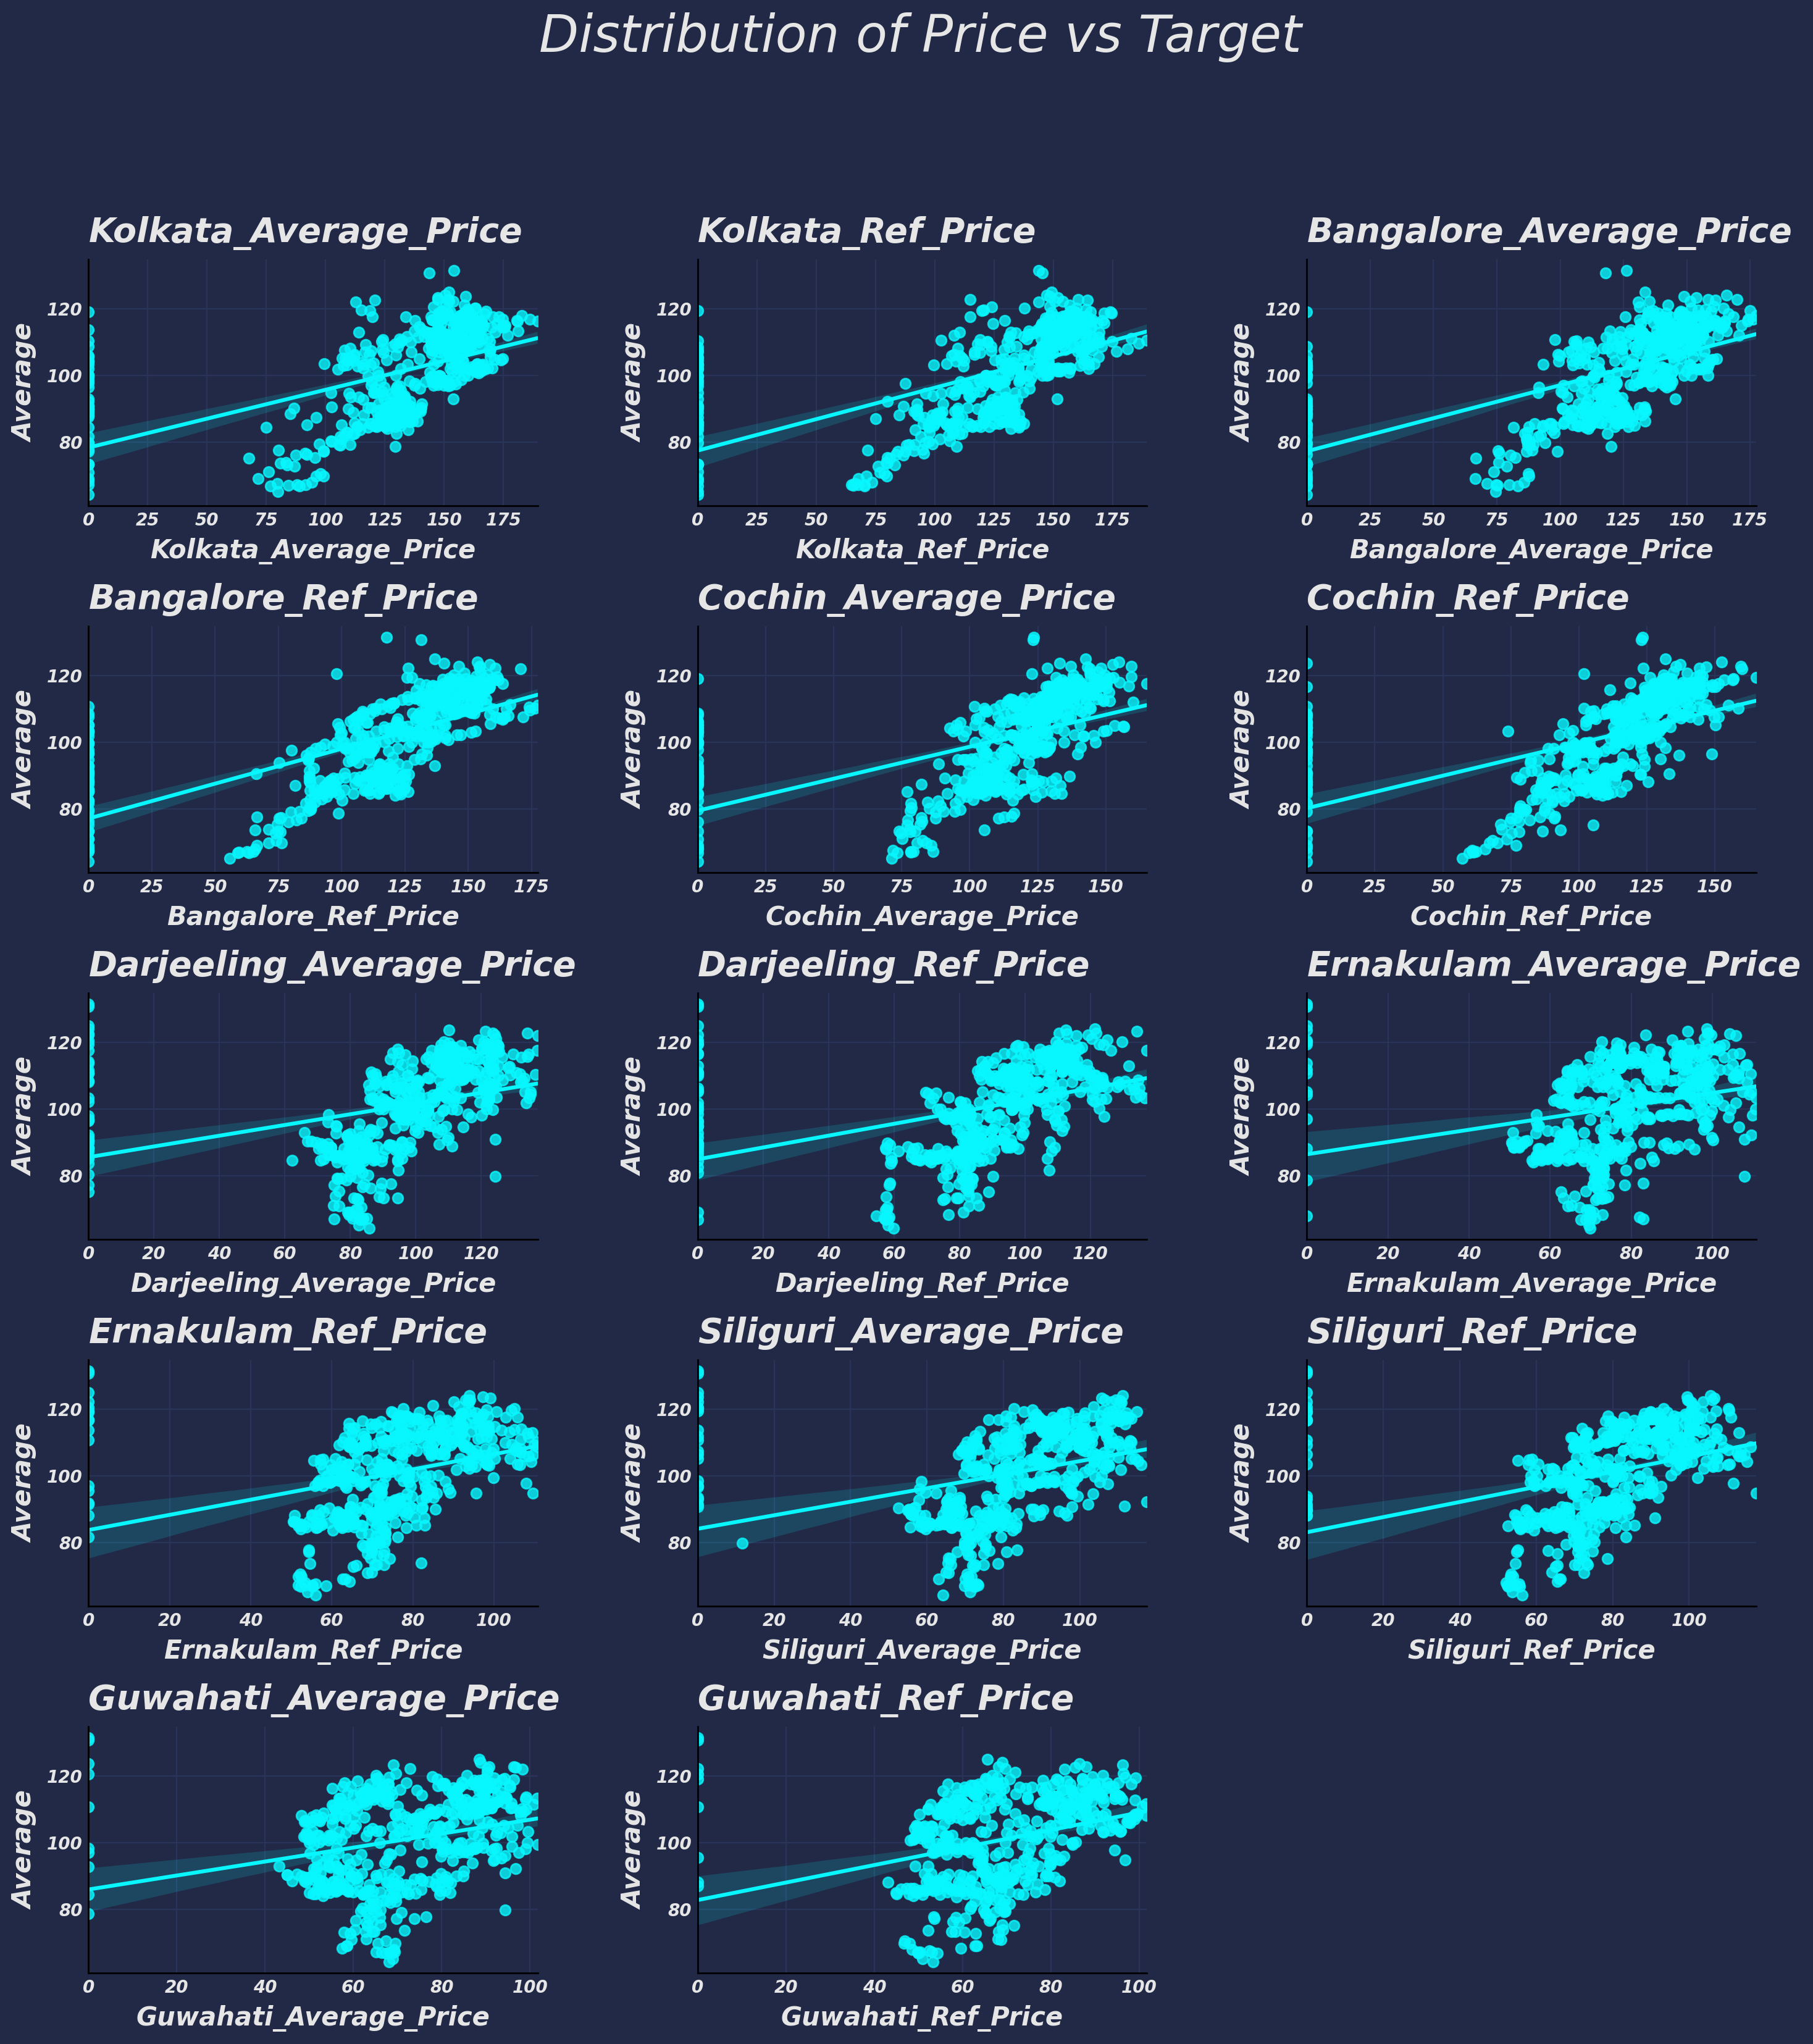

In [115]:
#plot vs target

plt.figure(figsize=(15,15)) 

for i,j in enumerate(price.columns): 
    plt.subplot(5,3,i+1) 
    
    sns.regplot(x = train[j],y=train.Average)
    plt.title(j)
    
plt.suptitle("Distribution of Price vs Target",size=30, y=1.1) 
plt.tight_layout()
plt.show()

In [ ]:
# Week ending date

In [12]:
train["WeekEnding_Date"] = pd.to_datetime(train["WeekEnding_Date"]) 

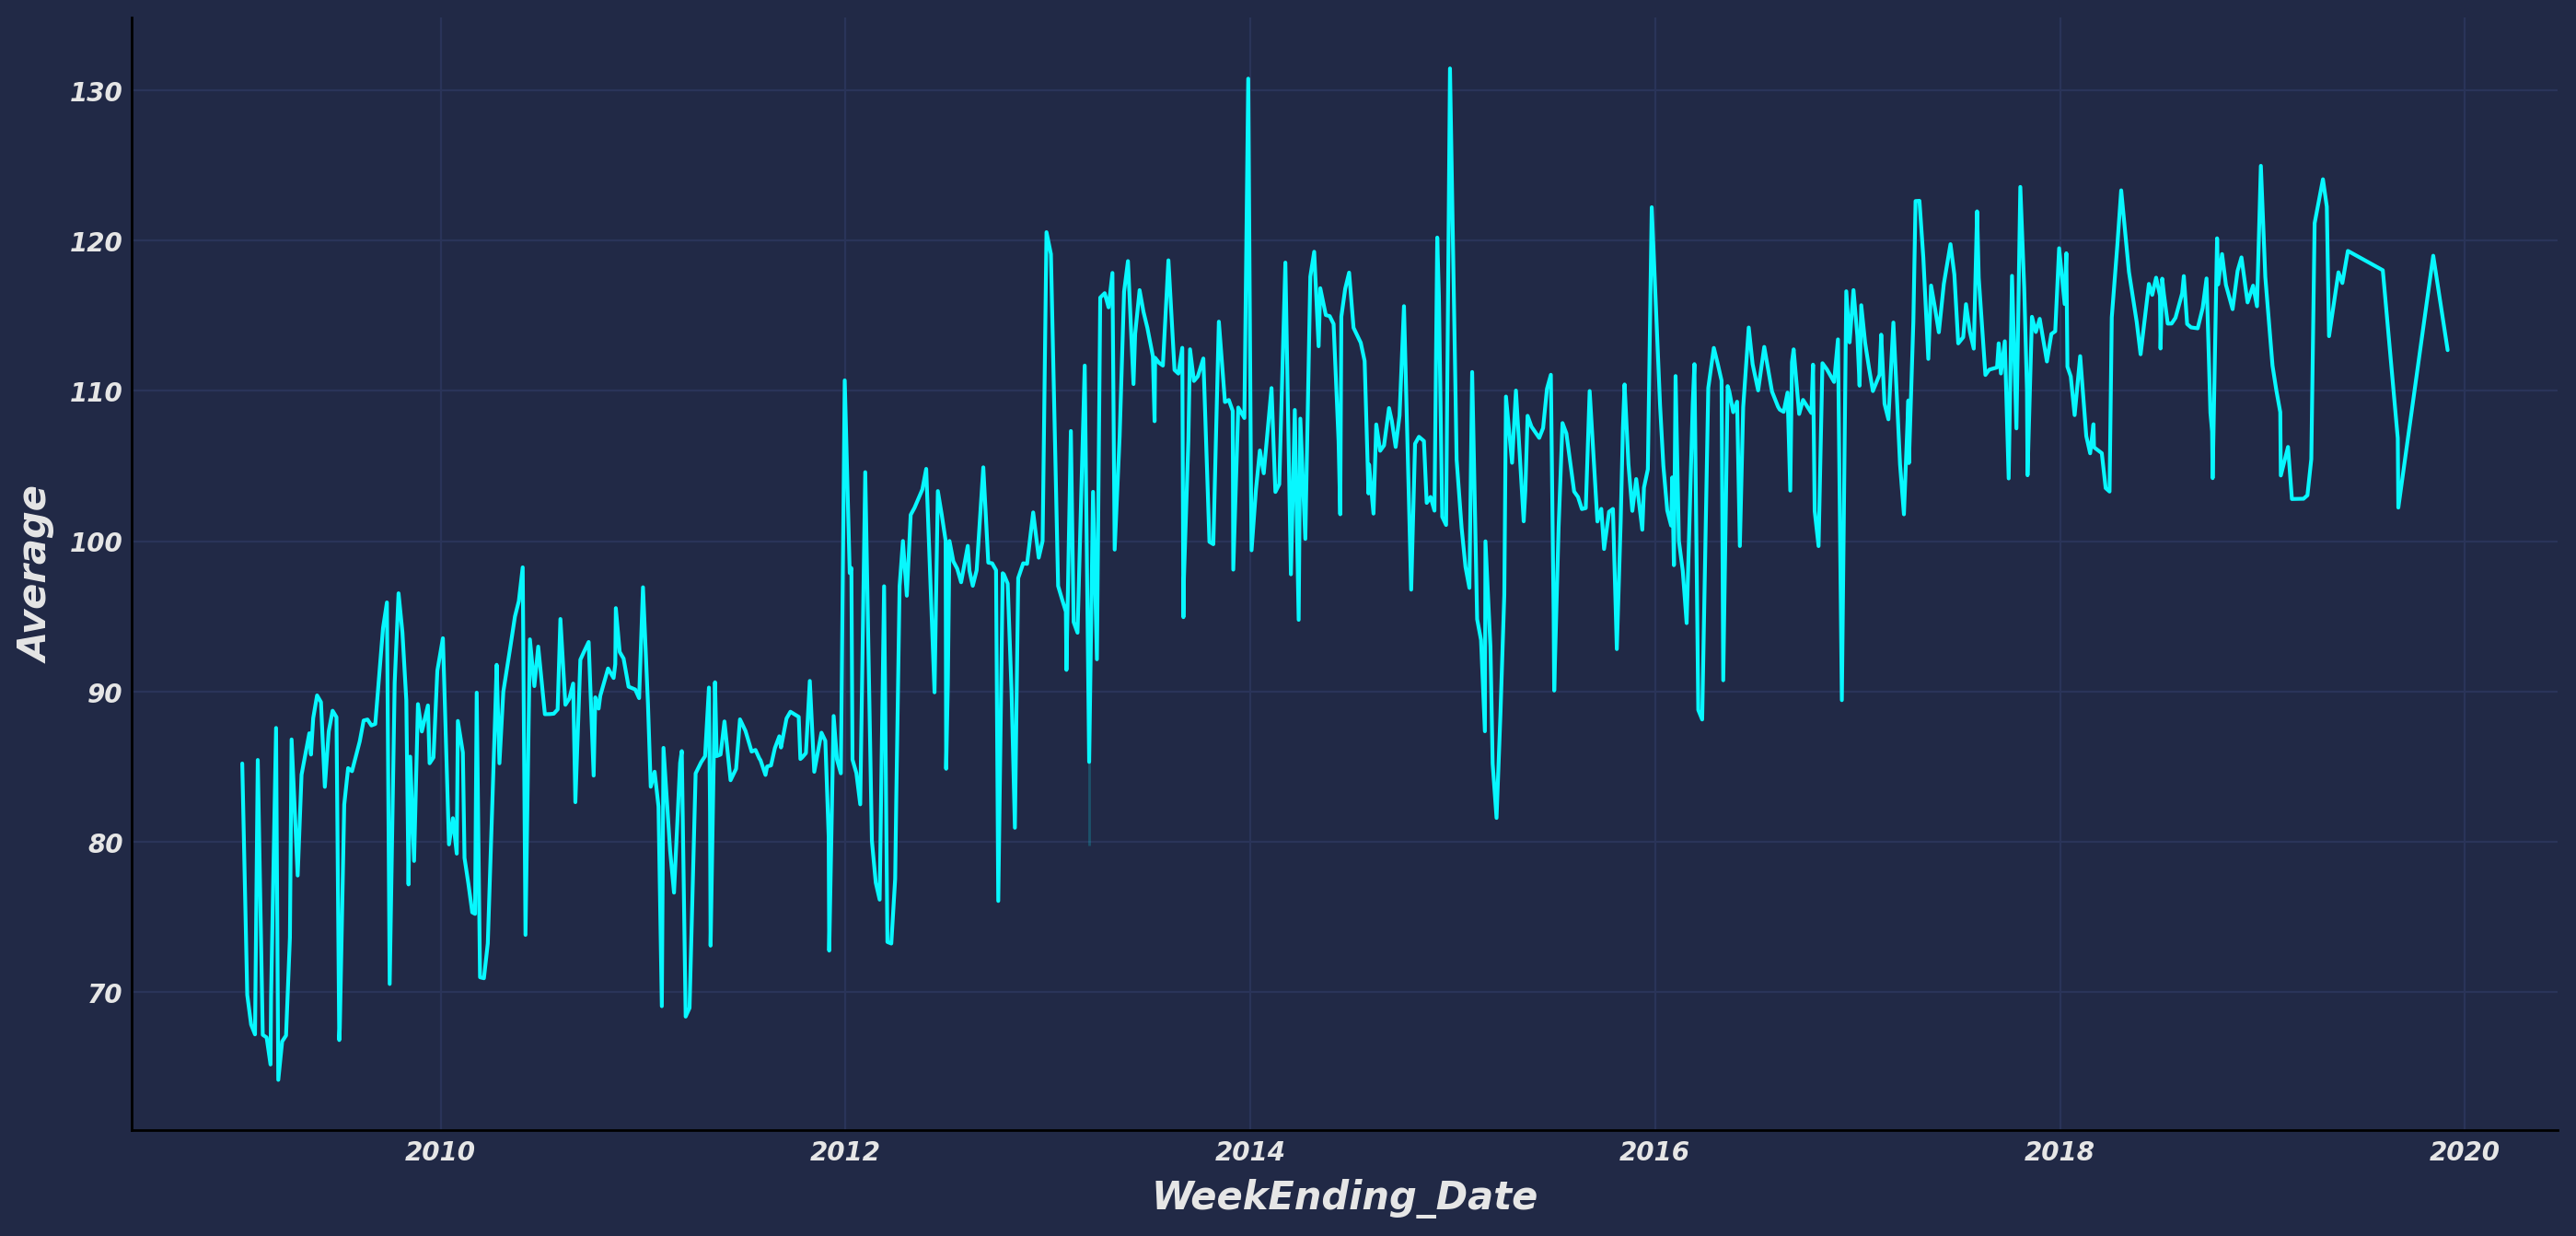

In [120]:
plt.figure(figsize=(17, 8)) 
sns.lineplot(x=train.WeekEnding_Date,y=train.Average)

In [18]:
Years = train.WeekEnding_Date.dt.year.astype("object") 

In [19]:
Years.describe()

count      544
unique      11
top       2016
freq        53
Name: WeekEnding_Date, dtype: int64

In [17]:
Years.value_counts() 

2016    53
2011    53
2017    52
2015    52
2014    52
2013    52
2012    52
2010    52
2009    52
2018    51
2019    23
Name: WeekEnding_Date, dtype: int64

In [20]:
train.groupby(Years)["Average"].mean().to_frame()

,Average
WeekEnding_Date,
2009,82.054792
2010,87.374883
2011,84.971186
2012,94.419930
2013,107.586470
2014,108.530668
2015,102.020831
2016,107.090519
2017,113.429243


Text(0, 0.5, 'Average')

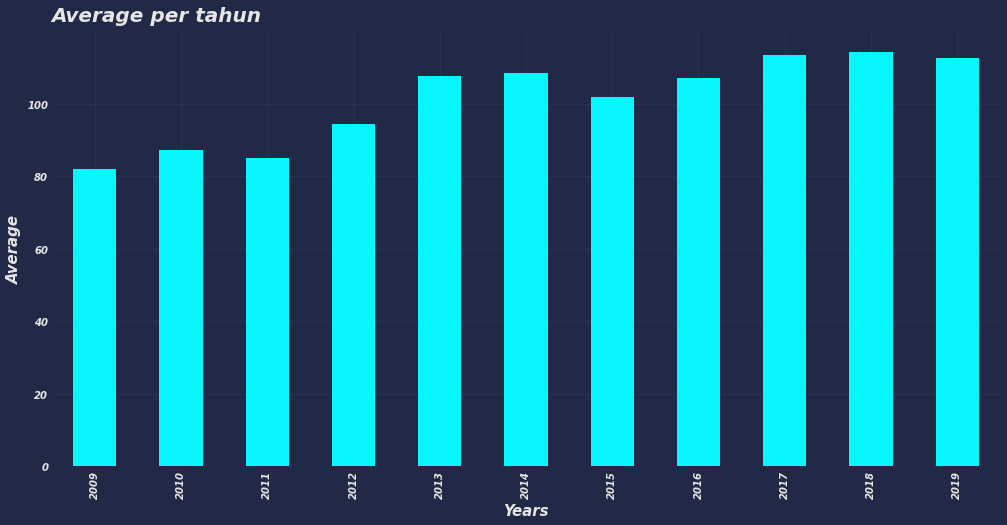

In [31]:
train.groupby(Years)["Average"].mean().plot(kind="bar",figsize=(17,8))
plt.title("Average per tahun")
plt.xlabel("Years")
plt.ylabel("Average")


In [39]:
Months = train.WeekEnding_Date.dt.month.astype("object") 

In [40]:
Months.describe()

count     544
unique     12
top         3
freq       48
Name: WeekEnding_Date, dtype: int64

Text(0, 0.5, 'Average')

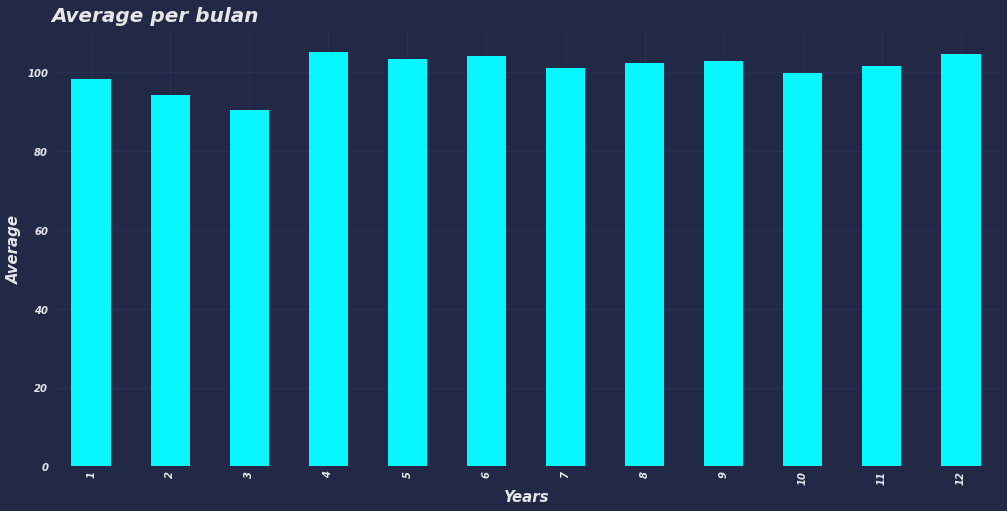

In [41]:
train.groupby(Months)["Average"].mean().plot(kind="bar",figsize=(17,8))
plt.title("Average per bulan")
plt.xlabel("Years")
plt.ylabel("Average")


In [ ]:
#terlihat buruk/tidak berguna

In [127]:
#drop WeekEnding date
for i in [train,test]:
    i.drop("WeekEnding_Date", axis=1, inplace=True) 

In [45]:
train.head()

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,99.01,79.79,0.00,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,94.14,73.38,85.69,65.66,0.00,65.57,80.87,54.59,0.00,53.43,71.12,52.07,69.14,48.50,67.846667
4,91.45,70.39,0.00,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.30,52.50,69.39,50.33,67.196923


## MODELLING without nan 

In [131]:
x = train.drop("Average",axis=1)
y = train.Average

In [129]:
x.head()

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price
0,99.01,79.79,NaN,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75
1,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84
2,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04
3,94.14,73.38,85.69,65.66,NaN,65.57,80.87,54.59,NaN,53.43,71.12,52.07,69.14,48.50
4,91.45,70.39,NaN,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.30,52.50,69.39,50.33


In [132]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42) 

In [69]:
RF = RandomForestRegressor(random_state=10)
DT = DecisionTreeRegressor(random_state=17) 

In [74]:
for models in [RF,DT]:
    print(models)
    models.fit(x_train, y_train)
    
    rmse = mean_squared_error(y_val, models. predict(x_val), squared=False) 
    
    print(f"rmse: {rmse} \n")

RandomForestRegressor(random_state=10)
rmse: 3.647384720644981 

DecisionTreeRegressor(random_state=17)
rmse: 5.008878931201491 



In [75]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)

In [78]:
KNN = KNeighborsRegressor()
SVM = SVR() 
LR = LinearRegression() 

In [79]:
for models in [KNN,SVM,LR]:
    print(models)
    models.fit(x_train, y_train)
    
    rmse = mean_squared_error(y_val, models. predict(x_val), squared=False) 
    
    print(f"rmse: {rmse} \n")

KNeighborsRegressor()
rmse: 4.371877537246959 

SVR()
rmse: 7.0059941548630436 

LinearRegression()
rmse: 9.497235920259937 



In [ ]:
#terlihat buruk 

## cara kedua pakai nan dan blending, karena banyak nya nilai nan di data test

In [133]:
x_train.head(10)

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price
210,142.04,119.00,122.05,89.74,118.56,96.85,104.11,83.46,99.35,68.11,98.31,68.54,98.99,64.48
185,154.41,135.41,144.16,122.06,129.30,112.84,94.26,75.14,77.23,56.67,80.73,58.44,80.06,53.69
370,117.94,123.81,113.04,100.35,105.48,102.42,123.56,96.13,104.49,80.16,103.93,81.69,83.86,58.71
543,151.61,156.67,146.91,153.37,147.83,145.44,120.12,112.83,92.16,76.98,105.16,91.57,84.63,67.13
396,159.40,163.72,144.15,151.02,132.32,127.01,114.47,86.66,85.97,64.57,90.28,70.21,78.33,56.71
176,164.07,131.12,158.06,123.70,150.25,119.69,101.01,76.63,86.77,57.23,88.23,60.54,75.71,55.19
393,171.50,169.33,154.04,150.99,142.89,126.49,113.15,87.72,91.00,65.03,94.33,73.46,82.86,58.21
537,151.90,150.52,151.25,160.65,148.19,144.21,124.04,119.28,99.65,90.07,108.28,103.59,90.27,69.64
310,162.89,146.96,133.06,121.76,120.28,125.78,96.27,96.62,65.53,71.78,75.23,79.85,49.87,76.89
376,111.62,NaN,NaN,NaN,NaN,78.45,111.15,94.64,91.66,78.68,95.91,79.40,80.96,65.30


In [134]:
y_train.head(10)

210     98.113571
185     98.171429
370     99.683571
543    118.029286
396    108.915714
176    103.442857
393    112.928571
537    122.252857
310    101.626429
376     88.777000
Name: Average, dtype: float64

In [ ]:
#blending semua feature menjadi target

In [146]:
blend = x.mean(axis=1)

In [147]:
pred

0       69.700000
1       70.550000
2       69.830000
3       67.846667
4       67.196923
5       66.818462
6       67.167143
7       66.990714
8       65.194615
9       67.595385
10      64.171250
11      66.724000
12      67.122500
13      73.631538
14      77.170833
15      77.764545
16      84.473571
17      85.451429
18      87.847143
19      88.230769
20      89.745385
21      89.300714
22      83.663333
23      87.355000
24      88.727143
25      88.299286
26      86.817143
27      85.673571
28      84.908571
29      84.703571
30      85.217692
31      86.692143
32      88.075714
33      88.142857
34      87.747143
35      87.227000
36      89.079091
37      94.232143
38      95.931429
39      87.581818
40      90.577273
41      96.540000
42      93.929231
43      89.415000
44      82.483571
45      78.733571
46      89.167857
47      87.347857
48      85.812857
49      85.230714
50      85.618571
51      91.394444
52      88.046667
53      82.643571
54      79.834615
55      81

In [148]:
mean_squared_error(y,blend,squared=False)

2.1121211544728793e-08

In [150]:
mean_absolute_error(y,blend) 

1.435757353530174e-08

In [157]:
r2_score(y,blend)

1.0

Text(0, 0.5, 'prediction')

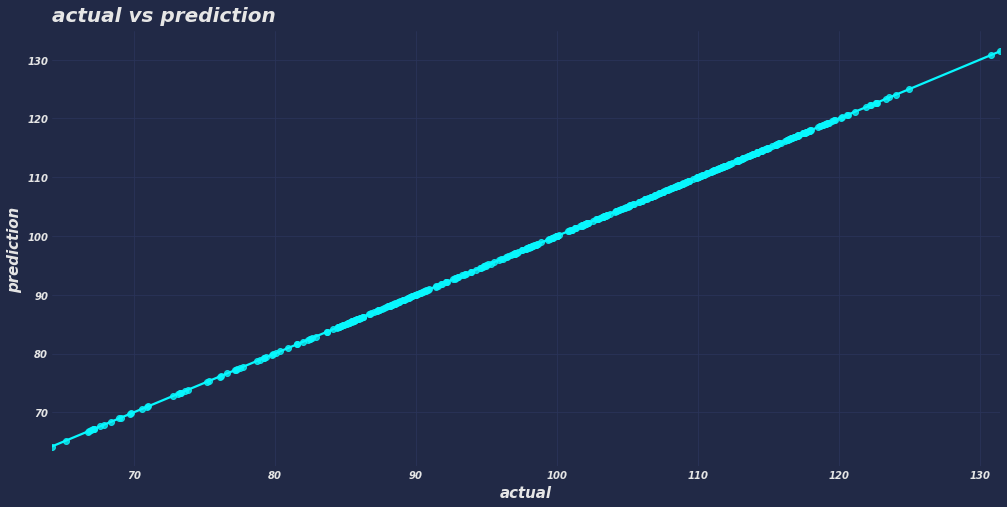

In [152]:
plt.figure(figsize=(17,8))

sns.regplot(x=y, y=blend)
plt.title("actual vs prediction") 
plt.xlabel("actual") 
plt.ylabel("prediction")

In [ ]:
#perfect

## final 

In [160]:
average = test.drop("Average", axis=1) 

In [161]:
average

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price
0,NaN,165.87,154.080,160.82,NaN,NaN,116.45,112.82,91.82,NaN,102.30,NaN,83.07,65.34
1,171.35,173.12,NaN,NaN,NaN,NaN,NaN,NaN,90.68,76.34,NaN,NaN,81.34,NaN
2,NaN,NaN,156.140,NaN,NaN,150.39,NaN,NaN,NaN,NaN,96.84,NaN,NaN,NaN
3,NaN,NaN,158.040,NaN,NaN,146.68,111.24,111.47,NaN,NaN,97.87,NaN,NaN,NaN
4,NaN,NaN,157.550,163.85,NaN,144.87,NaN,111.44,NaN,NaN,NaN,NaN,NaN,NaN
5,179.47,NaN,NaN,NaN,NaN,NaN,107.52,111.32,77.77,80.61,89.80,NaN,NaN,NaN
6,NaN,NaN,163.940,NaN,NaN,NaN,NaN,NaN,NaN,81.98,NaN,NaN,NaN,NaN
7,182.14,NaN,NaN,NaN,NaN,142.63,NaN,NaN,NaN,83.83,NaN,NaN,NaN,NaN
8,183.59,NaN,NaN,160.61,138.75,139.98,NaN,NaN,79.64,NaN,NaN,NaN,NaN,NaN
9,NaN,169.98,NaN,NaN,NaN,NaN,NaN,121.85,NaN,NaN,NaN,98.66,NaN,NaN


In [163]:
y_pred = average.mean(axis=1)

In [164]:
sub["Average"] = y_pred

In [165]:
sub

,Average
0,116.952222
1,118.566000
2,134.456667
3,125.060000
4,144.427500
5,107.748333
6,122.960000
7,136.200000
8,140.514000
9,130.163333


In [ ]:
sub.to_csv("my_sub.csv",index=False)